In [1]:
import netCDF4
from netCDF4 import Dataset 

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

import numpy as np

plt.rcParams["font.family"] = "Arial"

In [2]:
rf = 'RF15'

In [3]:
df = pd.read_csv('/Volumes/Hard Drive/2018 - SOCRATES/Data/HIMAWARI Cloud Top Characteristics Matching Files/' + rf + '_satellite_flight_track_match.csv', index_col = 0)

if rf == 'RF02': 
    startT = '2018-01-19 01:33:00'
    endT = '2018-01-19 03:24:00'

if rf == 'RF12': 
    startT = '2018-02-18 00:30:00'
    endT = '2018-02-18 02:38:00'
    
if rf == 'RF15':
    startT = '2018-02-24 02:26:00'
    endT = '2018-02-24 03:52:00'

    
df.index = pd.to_datetime(df.index)

df_gv = pd.read_csv('Desktop/all_rf_flights_cloud_top_info.csv', index_col = 0)
df_gv = df_gv[df_gv['RF'] == rf]
df_gv.index = pd.to_datetime(df_gv.index)
df_gv_resampled = df_gv.resample('10s').mean()

/Users/troyzaremba/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


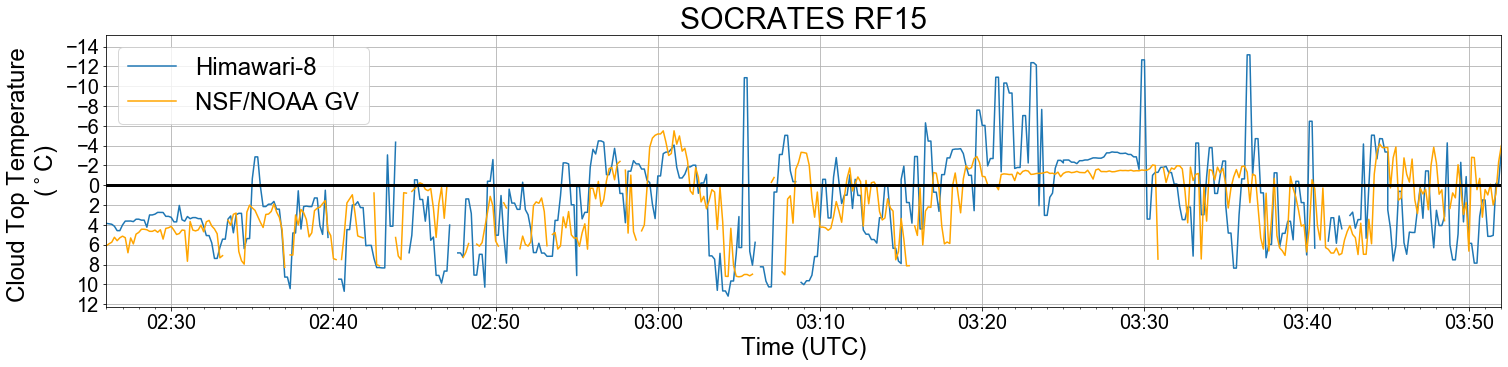

In [4]:
min_temp = df.between_time(startT[11:], endT[11:])['Cloud Top Temperature'].min() - 2
max_temp = df_gv.between_time(startT[11:], endT[11:])['Temp'].max() + 2



fig, ax = plt.subplots(figsize = (25, 5))
ax = plt.gca()

plt.plot(df.between_time(startT[11:], endT[11:])['Cloud Top Temperature'], label = 'Himawari-8')
plt.plot(df_gv_resampled['Temp'], color = 'orange', label = 'NSF/NOAA GV')

plt.ylim(max_temp, min_temp)

ax.xaxis.set_major_locator(mdates.MinuteLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
xlocator = mdates.MinuteLocator(byminute=[0, 10, 20, 30, 40, 50], interval = 1)

xlocator2 = mdates.MinuteLocator(byminute=np.arange(0, 60, 1), interval = 1)

ax.xaxis.set_major_locator(xlocator)
ax.xaxis.set_minor_locator(xlocator2)

ax.yaxis.set_major_locator(MultipleLocator(2))

plt.grid(True)

plt.ylabel('Cloud Top Temperature \n($^\circ$C)', fontsize = 24)
plt.xlabel('Time (UTC)', fontsize = 24)
plt.title('SOCRATES ' + rf, fontsize = 30)
plt.xlim(startT, endT)
plt.axhline(0, linewidth = 3, color = 'black')

ax.tick_params(which='both',labelsize=20)

plt.legend(fontsize = 24)
#plt.savefig('Desktop/RF15_ctt.pdf', format = 'pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

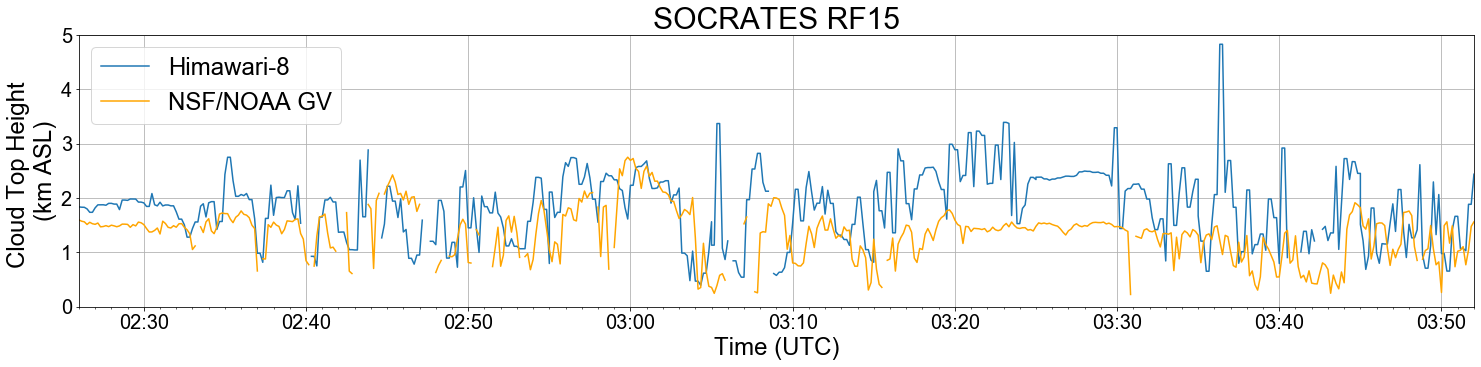

In [5]:
fig, ax = plt.subplots(figsize = (25, 5))
ax = plt.gca()

plt.plot(df.between_time(startT[11:], endT[11:])['Cloud Top Height'], label = 'Himawari-8')
plt.plot(df_gv_resampled['Cloud Top Height']/1000, color = 'orange', label = 'NSF/NOAA GV')


ax.xaxis.set_major_locator(mdates.MinuteLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
xlocator = mdates.MinuteLocator(byminute=[0, 10, 20, 30, 40, 50], interval = 1)

xlocator2 = mdates.MinuteLocator(byminute=np.arange(0, 60, 1), interval = 1)

ax.xaxis.set_major_locator(xlocator)
ax.xaxis.set_minor_locator(xlocator2)

ax.yaxis.set_major_locator(MultipleLocator(1))

plt.grid(True)
plt.ylabel('Cloud Top Height \n(km ASL)', fontsize = 24)
plt.xlabel('Time (UTC)', fontsize = 24)
plt.title('SOCRATES ' + rf, fontsize = 30)
plt.xlim(startT, endT)

ax.tick_params(which='both',labelsize=20)

plt.legend(fontsize = 24)

plt.ylim(0, 5)

#plt.savefig('Desktop/RF15_cth.pdf', format = 'pdf', dpi = 300, bbox_inches = 'tight')
plt.show()